Implication
=======

An implication is the ability to draw some conclusion from some hypothesis.  **Prove-It** has an `Implies` **Operation** that may be used to represent an implication, formatted with the $\Rightarrow$ symbol.  While this is a core concept, and aliased at the top `proveit` level, it is defined outside of the core in the `proveit.logic` package.  It is known in the core for use in the *modus ponens* and *hypothetical reasoning* derivation steps discussed below.  First we will take a brief tour of the `Implies` class.

In [1]:
from proveit import Implies # actually defined in proveit.logic.boolean.boolOps.py
from proveit.common import A, B
A_impl_B = Implies(A, B)
A_impl_B # Expression meaning "A implies B":

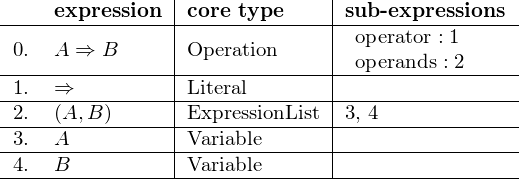

In [2]:
# Implies is an Operation
A_impl_B.exprInfo()

In [3]:
# access the `hypothesis` of the implication
A_impl_B.hypothesis

In [4]:
# access the `conclusion` of the implication
A_impl_B.conclusion

### Modus Ponens

*Modus ponens* is a straightforward derivation step in which you can derive $B$ assuming that $A \Rightarrow B$ and $A$ are both true statements.  You can apply this derivation step by calling the `deriveConclusion` method of any `Implies` object.

In [5]:
B_from_A = A_impl_B.deriveConclusion(assumptions={A, A_impl_B})
B_from_A

Recall from the previous tutorial that **Prove-It**, in its core, is not concerned about truth-aptness.  Neither $A$ nor $B$ are required to be intrinsically truth-apt.  The above known truth simply means that $B$ is a true statement if we assume that $A$ and $A \Rightarrow B$ are true statements.

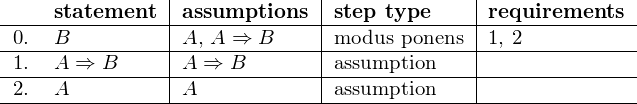

In [6]:
B_from_A.proof()

In order for the *modus ponens* derivation step to succeed, the implication and the hypothesis must be proven to be true under the assumptions to are passed into the `deriveConclusion` method (or set as the default assumptions).

In [7]:
from proveit import ModusPonensFailure
try:
    A_impl_B.deriveConclusion(assumptions={A})
except ModusPonensFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Implication is not proven: A => B assuming {A}


In [8]:
from proveit import ModusPonensFailure
try:
    A_impl_B.deriveConclusion(assumptions={A_impl_B})
except ModusPonensFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Hypothesis is not proven: A assuming {A => B}


Next, let us look at a more interested example in which we will proof the hypothesis without requiring an assumption, but do so after we perform the derivation step.   This demonstrates that, although requirements must be satisfied at the time that derivation steps are invoked, one can work backwards in a proof through the use of temporary assumptions.  Typically, a forward proof is preferable for clarity, but flexibility is a key part of the **Prove-It** philosophy.

In [9]:
from proveit.logic import TRUE
TRUE # Literal for "true"

In [10]:
T_impl_A = Implies(TRUE, A)
T_impl_A

In [11]:
# we have to assume TRUE because it isn't known to be true until we invoke an axiom (below)
A_from_T = T_impl_A.deriveConclusion({T_impl_A, TRUE})
A_from_T

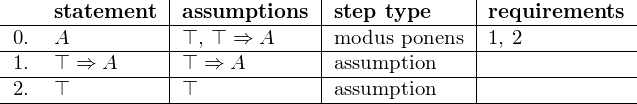

In [12]:
A_from_T.proof()

In [13]:
# now let us invoke the axiom the let's Prove-It know that TRUE is a true statement
from proveit.logic.boolean.axioms import trueAxiom
trueAxiom

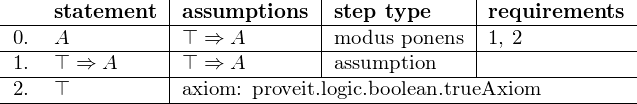

In [14]:
# When we do this, it automatically updates our A_from_T proof, 
# since it depends upon TRUE as a true statement (under a temporary assumption)
A_from_T.proof()

In [15]:
# The KnownTruth still shows TRUE in the assumptions;  KnownTruth objects
# are immutable except for its proof which may be updated as we saw.
A_from_T

In [16]:
# However, its updated proof refers to a KnownTruth that is also up-to-data
updated_A_from_T = A_from_T.proof().provenTruth
updated_A_from_T

### Hypothetical Reasoning

*Hypothothetical reasoning* is, in some sense, the reverse process of *modus ponens*.  In *modus ponens* a conclusion is derived from an implication (and its hypothesis).  In *hypothetical reasoning* the implication is derived from the conclusion, discarding the hypothesis as an assumption.  This step may be taken by calling `asImplication` (or `asImpl` as an abbreviation) on a **KnownTruth**.  For example,

In [17]:
# T => A transforms from an assumption to a hypothesis.
updated_A_from_T.asImplication(T_impl_A)

The new hypothesis does not need to be in the set of assumptions.  That is because imposing an extra hypothesis only weakens the original truth.  It does not matter if $B$ is truth-apt (again, the core is agnostic to truth-aptness).  An implication can be said to be true as long as its conclusion is true whenever (not "if and only if") its hypothesis is true.  Since $A$ is proven true independently from $B$, this is vacuously true.

In [18]:
updated_A_from_T.asImplication(B)

In situations like the former case, where the new hypothesis was drawn from the set of assumptions, we can think of *hypothetical reasoning* as a procedure in which we transform an "implicit" assumption to an "explicit" hypothesis.  Similarly, *modus ponens* may be used to transform an "explicit" hypothesis to an "implicit" assumption.  What is the difference between these two different forms of assumption/hypothesis?  Why do we need both forms?  The explicit form is necessary because the implicit form cannot be nested.  One cannot precisely express $(\top \Rightarrow A) \Rightarrow A$ with assumptions alone.  The implicit form is extremely convenient in **Prove-It** because it allows us to access and manipulate the conclusion part of an implication directly.  Since **Expression**s are objects that often have convenient methods that are useful to the particular type of **Expresssion**, this is valueable.  For example,

In [19]:
from proveit.logic import Iff, Equals
eqAB_implies_iff = Implies(Equals(A, B), Iff(A, B))
# expression denoting the fact that (A => B) and (B => A) if it is the case that (A = B).
# we are not proving this to be true here, we will simply assume it to be true (sufficient for this demonstration)
eqAB_implies_iff 

In [20]:
# now we will invoke derivedReversed which applies `proveit.logic.booleans.theorems.iffSymmetry`
assumptions = {eqAB_implies_iff, Equals(A, B)}
iffBAtruth = eqAB_implies_iff.deriveConclusion(assumptions).deriveReversed(assumptions)
iffBAtruth

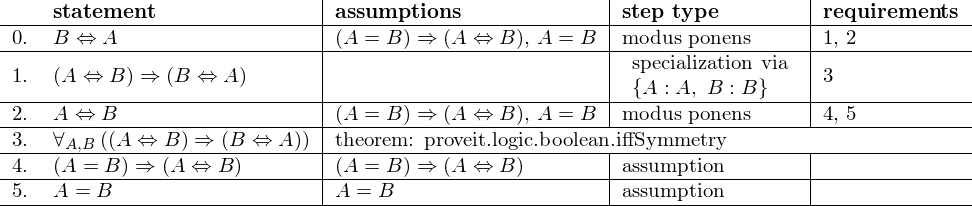

In [21]:
iffBAtruth.proof()

This invokes the `derivedReversed` method that is defined for `Iff` objects and applies the theorem `proveit.logic.booleans.iffSymmetry`.  The proof uses specialialization which will be discussed soon in `tutorial_05_core_forall`.  Theorems will be discussed later.